In [2]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio

NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2
n = 600

def create_points():
    x = [np.random.randint(1, 100) for i in range(n)]
    y = [np.random.randint(1, 100) for i in range(n)]
    temp = []
    for i in range (n):
        temp.append([x[i], y[i]])
    train = np.array(temp)
    return train
        
train = create_points()

def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['blue', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #все шумы черным цветом
            color='black'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j,0])
                y1.append(data[j,1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')

In [3]:
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if (np.sqrt((data[i,0] - data[pointId,0]) ** 2 + (data[i,1] - data[pointId,1]) ** 2)) <= radius:
            points.append(i)
    return points

In [4]:
def dbscan(data, Eps, MinPt):
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    corepoint=[]
    noncore=[]
    
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    cl = 1
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1
           
    return pointlabel,cl

eps = 5, minpts = 3


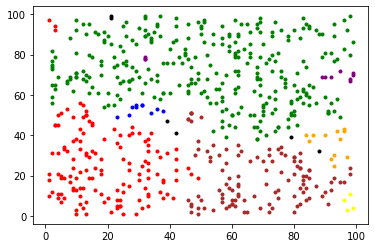

колво кластеров 12
eps = 5, minpts = 7


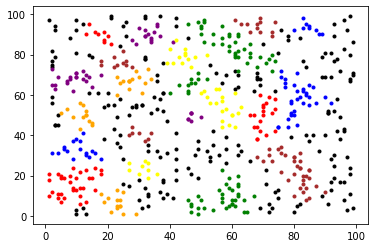

колво кластеров 23
eps = 10, minpts = 3


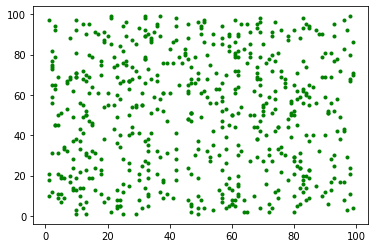

колво кластеров 1
eps = 10, minpts = 7


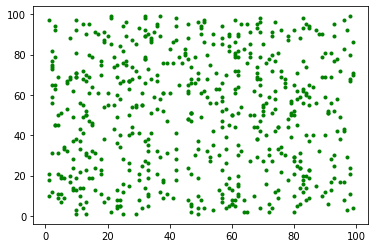

колво кластеров 1


In [5]:
epss = [5,10]
minptss = [3,7]

for eps in epss:
    for minpts in minptss:
        print('eps = ' +str(eps)+ ', minpts = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('колво кластеров ' + str(cl-1))